In [13]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


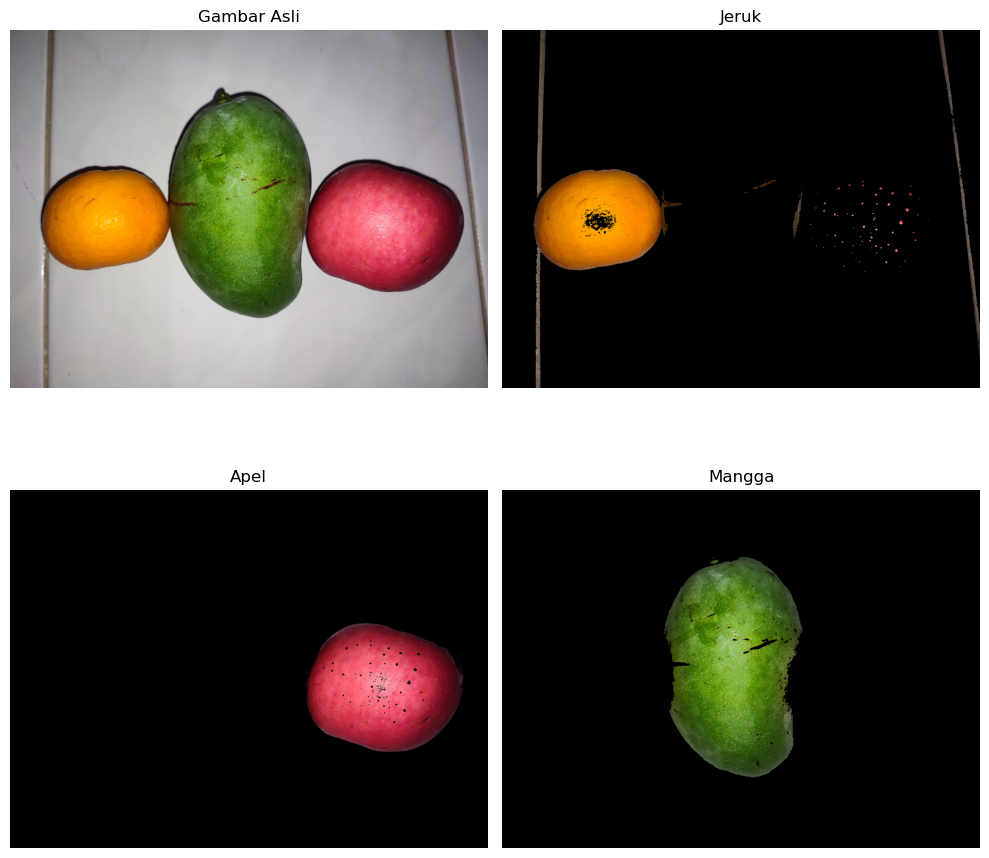

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar dengan tiga buah dan latar belakang
img = cv2.imread('buah.jpg')

# Konversi gambar ke mode warna HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definisikan batas warna untuk setiap buah
lower_orange = np.array([0, 50, 50])
upper_orange = np.array([20, 255, 255])

lower_red = np.array([160, 50, 50])
upper_red = np.array([179, 255, 255])

lower_green = np.array([35, 50, 50])
upper_green = np.array([90, 255, 255])

# Membuat mask untuk setiap buah berdasarkan batas warna
mask_orange = cv2.inRange(hsv_img, lower_orange, upper_orange)
mask_red = cv2.inRange(hsv_img, lower_red, upper_red)
mask_green = cv2.inRange(hsv_img, lower_green, upper_green)

# Menghapus latar belakang menggunakan bitwise AND untuk setiap buah
result_orange = cv2.bitwise_and(img, img, mask=mask_orange)
result_red = cv2.bitwise_and(img, img, mask=mask_red)
result_green = cv2.bitwise_and(img, img, mask=mask_green)

# Menggunakan operasi morfologi untuk membersihkan mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_mask_orange = cv2.morphologyEx(mask_orange, cv2.MORPH_OPEN, kernel)
cleaned_mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)
cleaned_mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)

# Menemukan kontur dari mask yang telah dibersihkan untuk setiap buah
contours_orange, _ = cv2.findContours(cleaned_mask_orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_red, _ = cv2.findContours(cleaned_mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_green, _ = cv2.findContours(cleaned_mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Memisahkan dan menampilkan setiap buah yang telah dihapus latar belakangnya
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Mengatur ukuran gambar

# Tampilan asli
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Gambar Asli')
axs[0, 0].axis('off')

# Buah dengan warna orange
axs[0, 1].imshow(cv2.cvtColor(result_orange, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Jeruk')
axs[0, 1].axis('off')

# Buah dengan warna merah
axs[1, 0].imshow(cv2.cvtColor(result_red, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Apel')
axs[1, 0].axis('off')

# Buah dengan warna hijau
axs[1, 1].imshow(cv2.cvtColor(result_green, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Mangga')
axs[1, 1].axis('off')

plt.tight_layout()
plt.savefig('hasil_gambar.png')  # Menyimpan hasil gambar
plt.show()
